# Worksheet 12

Name: Alexander Miller
UID: U52161825

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. yes
2. no (unless you can discretely model the number of months (ex: 1-100 months in whole months))
3. yes
4. no (unless you can discretely model the number of births (ex: 1-100 births in whole births))


b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

I would split the data into a training set and a testing set. I would use the training set to learn a model and the testing set to get an idea of how the model might perform on data it has never seen.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting is when a model is too simple to capture the underlying structure of the data. Signs of underfitting include a low training accuracy and a low testing accuracy.
Overfitting is when a model is too complex and captures noise in the data. Signs of overfitting include a high training accuracy and a low testing accuracy.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

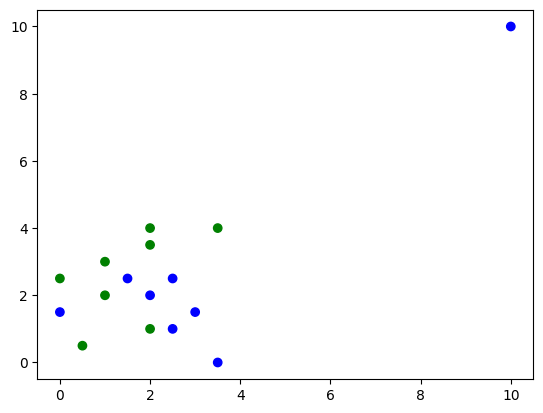

In [4]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

The last point (10,10) could be considered an outlier.

In [5]:
for key in data:
    data[key].pop()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

The last point (10,10) could be considered a noise point.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

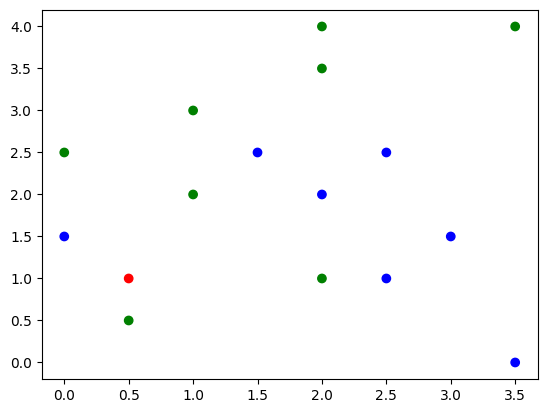

In [7]:
data["Attribute A"].append(0.5)
data["Attribute B"].append(1)
data["Class"].append(2)
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

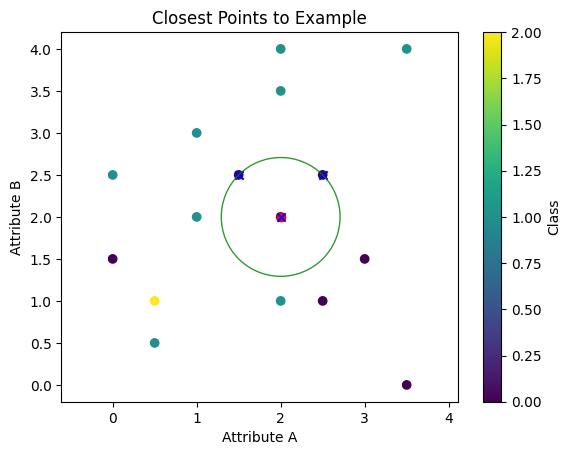

In [11]:
def n_closest_to(example, n, data):
    # Extracting points from the data dictionary
    points = np.array(list(zip(data['Attribute A'], data['Attribute B'])))

    # Calculating the squared Euclidean distances
    squared_diff = np.sum((points - example)**2, axis=1)
    
    # Find the indices of the minimum n distances
    closest_indices = np.argsort(squared_diff)[:n]

    # Return the indices and the distances
    return closest_indices, np.sqrt(squared_diff[closest_indices])
# Specify the point you're comparing everything else to
example_point = (2, 2)  # for instance

# Specify the number of closest points you want to consider
n_points = 3

# Find the closest points
closest_indices, closest_distances = n_closest_to(example_point, n_points, data)

# The farthest point among the closest ones dictates the radius
radius = np.max(closest_distances)

# Extracting points for scatter plot
attribute_A = data['Attribute A']
attribute_B = data['Attribute B']

# Create plot
_, axes = plt.subplots()
scatter = axes.scatter(attribute_A, attribute_B, c=data['Class'], cmap='viridis')  # color based on class
axes.scatter([example_point[0]], [example_point[1]], c='red')  # the point of interest

# Highlight the n closest points
for index in closest_indices:
    axes.scatter(attribute_A[index], attribute_B[index], c='blue', marker='x')

# Draw the circle
cir = plt.Circle(example_point, radius, fill=False, color='green', alpha=0.8)
axes.add_patch(cir)

# Equal aspect ratio ensures that the circle is drawn as a circle
axes.set_aspect('equal', adjustable='datalim')
plt.colorbar(scatter, ax=axes, label='Class')
plt.title('Closest Points to Example')
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [12]:
def majority(closest_indices, data, default_class=0):
    """
    Assign a class based on the majority vote of the classes of the closest points.

    :param closest_indices: Indices of the closest points in the dataset.
    :param data: The dataset dictionary containing 'Class' information.
    :param default_class: Default class to assign if there is a tie. Default is 0.
    :return: The assigned class.
    """
    # Extracting the classes of the closest points
    closest_classes = [data['Class'][index] for index in closest_indices]

    # Counting the occurrences of each class
    class_count = {}
    for cls in closest_classes:
        if cls in class_count:
            class_count[cls] += 1
        else:
            class_count[cls] = 1

    # Finding the class with maximum count. If there is a tie, the default_class is chosen.
    max_count = -1
    assigned_class = default_class
    for cls, count in class_count.items():
        if count > max_count:
            max_count = count
            assigned_class = cls

    return assigned_class

# Example usage:
# Assume we already found the closest points from previous steps.
closest_indices = [0, 1, 2]  # These are hypothetical indices of the closest points. You should use the ones computed by your function.

# Now, we'll use these indices to assign a class to the new point
assigned_class = majority(closest_indices, data)

print(f"The class assigned to the new point is: {assigned_class}")


The class assigned to the new point is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [14]:
import numpy as np

def leave_one_out_validation(data, default_class=0):
    correct_classifications = 0

    # Number of data points
    num_points = len(data['Class'])

    # Iterate over all data points
    for i in range(num_points):
        # Step 1: Create training set by excluding the ith data point and create the test point.
        training_set = {
            'Attribute A': data['Attribute A'][:i] + data['Attribute A'][i+1:],
            'Attribute B': data['Attribute B'][:i] + data['Attribute B'][i+1:],
            'Class': data['Class'][:i] + data['Class'][i+1:]
        }

        # Create the test point
        test_point = (data['Attribute A'][i], data['Attribute B'][i])

        # Step 2: Using the training set, find the n closest points to the test point in the training set.
        closest_indices, _ = n_closest_to(test_point, 3, training_set)  # Assuming n=3

        # Step 3: Predict the class of the test point based on the closest points in the training set.
        predicted_class = majority(closest_indices, training_set, default_class)

        # Step 4: Check if the predicted class matches the actual class and update count if correct.
        actual_class = data['Class'][i]
        if predicted_class == actual_class:
            correct_classifications += 1

    # Step 5: Calculate the overall accuracy by dividing correct predictions by total number of points.
    overall_accuracy = correct_classifications / num_points
    return overall_accuracy

accuracy = leave_one_out_validation(data)
print(f"Overall accuracy = {accuracy:.2f}")


Overall accuracy = 0.62
